In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('cidades_correto.csv')

In [5]:
alunos = pd.read_csv('A_Dou.csv', delimiter=';')
alunos.head()

,ANO,NIVEL,COD_CURSO,NOME_CURSO,CIDADE,PAIS,NOME_PAIS,TOTAL,Unnamed: 8
0,1997,D,5,Tecnologia de Alimentos,Altair,BR,Brasil,1,NaN
1,1997,D,5,Tecnologia de Alimentos,Americana,BR,Brasil,1,NaN
2,1997,D,5,Tecnologia de Alimentos,Amélia Rodrigues,BR,Brasil,1,NaN
3,1997,D,5,Tecnologia de Alimentos,Araraquara,BR,Brasil,1,NaN
4,1997,D,5,Tecnologia de Alimentos,Araras,BR,Brasil,1,NaN


In [6]:
data = pd.DataFrame({'cidade': alunos.CIDADE,
                 'numero': alunos.TOTAL,
                 'curso': alunos.COD_CURSO,
                 'nome_curso': alunos.NOME_CURSO,
                 'ano': alunos.ANO,
                 'UF': 'NA',
                 'lat': np.nan,
                 'lon': np.nan,
                 'dist': np.nan})
data.head()

,UF,ano,cidade,curso,dist,lat,lon,nome_curso,numero
0,NA,1997,Altair,5,NaN,NaN,NaN,Tecnologia de Alimentos,1
1,NA,1997,Americana,5,NaN,NaN,NaN,Tecnologia de Alimentos,1
2,NA,1997,Amélia Rodrigues,5,NaN,NaN,NaN,Tecnologia de Alimentos,1
3,NA,1997,Araraquara,5,NaN,NaN,NaN,Tecnologia de Alimentos,1
4,NA,1997,Araras,5,NaN,NaN,NaN,Tecnologia de Alimentos,1


In [7]:
for i, e in enumerate(df.cidade):
    c = data[data["cidade"] == e]
    for j, f in zip(c.index, c.cidade):
        data.at[j, "UF"] = df.at[i, "UF"]
        data.at[j, "dist"] = df.at[i, "dist"]
        data.at[j, "lat"] = df.at[i, "lat"]
        data.at[j, "lon"] = df.at[i, "lon"]
            


In [8]:
data.head()

,UF,ano,cidade,curso,dist,lat,lon,nome_curso,numero
0,SP,1997,Altair,5,336.079361,-0.358199,-0.856260,Tecnologia de Alimentos,1
1,SP,1997,Americana,5,33.309173,-0.396903,-0.826071,Tecnologia de Alimentos,1
2,BA,1997,Amélia Rodrigues,5,1461.630112,-0.216424,-0.676412,Tecnologia de Alimentos,1
3,SP,1997,Araraquara,5,168.990731,-0.380314,-0.840803,Tecnologia de Alimentos,1
4,SP,1997,Araras,5,69.719980,-0.390205,-0.827039,Tecnologia de Alimentos,1


In [9]:
data['dist'].replace('', np.nan, inplace=True)
data.dropna(inplace=True)

In [10]:
data.to_csv('dou.csv')

## Histograma distância

In [11]:
col = 12
threshold = 200

In [12]:
data_plt = sum([[float(data.at[i, "dist"])]*int(data.at[i, "numero"]) for i in data.index], [])

data_plt

[336.0793614927381,
 33.309173323487094,
 1461.6301124681552,
 168.99073135310218,
 69.7199798774829,
 304.0545257086781,
 304.0545257086781,
 217.48928044253327,
 1861.3706031779504,
 462.8545957417615,
 382.57770996634,
 141.48846395557507,
 221.87381278533047,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1094.6231257611264,
 125.59478343247746,
 218.28898932315502,
 2319.678547754926,
 2319.678547754926,
 839.7456412883597,
 24.863773309682227,
 1243.257735641818,
 57.85933222415361,
 299.95564160246875,
 402.42851358869734,
 421.9756452359685,
 199.37220235370398,
 1905.445167334286,
 2604.411623390807,
 477.07179099102166,
 111.65465544762414,
 408.1034244871903,
 469.853553289934,
 1554.9473087095666,
 63.504418636701295,
 63.504418636701295,
 63.504418636701295,
 63.504418636701295,
 893.8906858833873,
 893.8906858833873,
 206.36221767249316,
 206.36221767249316,
 75.4680599812467,
 392.5718459516502,
 392.5718459516502,
 392.5718459516502,
 392.5718459516502,
 392.5718459516502,
 545.3257112

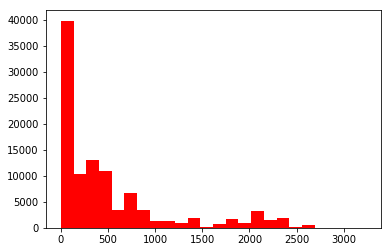

In [13]:
plt.hist(np.asarray(data_plt), 2*col, color='red')
plt.show()

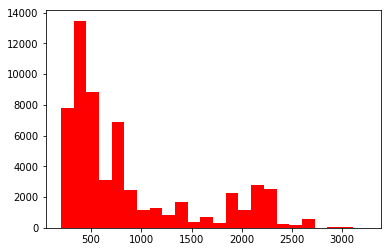

In [14]:
plt.hist(np.asarray([e for e in data_plt if e > threshold]), 2*col, color='red')
plt.show()

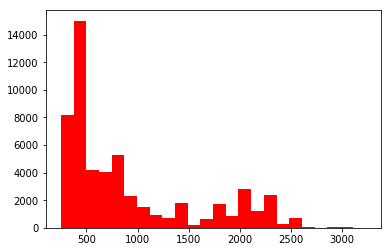

In [15]:
plt.hist(np.asarray([e for e in data_plt if e > threshold+50]), 2*col, color='red')
plt.show()

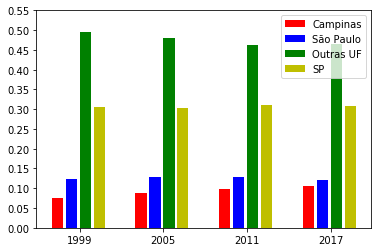

In [18]:
bar_width = 0.8

for i in [1999, 2005, 2011, 2017]:
    data_ano = data[data["ano"] == i]
    tot = sum(int(e) for e in data_ano.numero)
    sp = sum([int(e) for e in data_ano[data_ano["cidade"] == "São Paulo"].numero])
    camp = sum([int(e) for e in data_ano[data_ano["cidade"] == "Campinas"].numero])
    SP = sum([int(e) for e in data_ano[data_ano["UF"] == "SP"].numero],-camp -sp)
    SPn = sum([int(e) for e in data_ano[data_ano["UF"] != "SP"].numero])
    plt.bar(i, camp/tot, bar_width, color = 'r')
    plt.bar(i+1, sp/tot, bar_width, color = 'b')
    plt.bar(i+2, SPn/tot, bar_width, color='g')
    plt.bar(i+3, SP/tot, bar_width, color='y')
    plt.xticks([1999+1.6, 2005+1.6, 2011+1.6, 2017+1.6], ['1999', '2005', '2011', '2017'])
    plt.yticks([e if e == 0 else e/100 for e in range(0,60,5)])

plt.legend(['Campinas', 'São Paulo', 'Outras UF', 'SP'],loc='best')